## Data

In [76]:

import matplotlib
import nltk
import numpy as np
from nltk.corpus import stopwords

from notebooks.text_processing import add_sectarian_label
from notebooks.utils import generate_composition_to_book

matplotlib.rcParams['figure.figsize'] = (20, 10)


In [77]:


import re
import pandas as pd
import matplotlib.pyplot as plt

ALLOWED_CHARS = "אבגדהוזחטיכלמנסעפצקרשתםןףךץ. 1234567890"
chars_to_delete = re.compile("[\\\\\^><»≥≤/?Ø\\]\\[«|}{]")
from logger import get_logger

logger = get_logger(__name__)



In [78]:
from tf.app import use

A = use("ETCBC/dss", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


In [79]:
def remove_chars(s):
    chars_to_delete = "#ε^><»≥≤/?Ø«|}{׳"
    for char in chars_to_delete:
        s = s.replace(char, "")
    s = s.replace("\xa0", "").replace("׃", ".")
    return s


def replace_for_ot_sofit(word):
    OT_SOFIT = {"מ": "ם", "נ": "ן", "פ": "ף", "צ": "ץ", "כ": "ך"}
    last_char = word[-1]
    if len(word) == 1:
        return word
    if last_char in OT_SOFIT.keys():
        word = word[:-1] + OT_SOFIT[last_char]
    return word


def remove_not_heb_chars(word):
    new_word = []
    removed_chars = set()
    for char in word:
        if char in ALLOWED_CHARS:
            new_word.append(char)
    return "".join(new_word)


def remove_stop_words(row, stop_words):
    word = row.strip()  # Remove trailing spaces
    return word if word not in stop_words else None


def get_spaces_per_word(row):
    c = 0
    word = row.split(" ")
    for w in word:
        if w == "":
            c += 1
    return c


def get_biblical_from_line(line):
    """
    Returns the biblical section of a line.
    """
    bib = F.biblical.v(line)
    if bib == None:
        return "nonbib"
    elif bib == 1:
        return "bib"
    elif bib == 2:
        return "biblical_non_biblical"


nltk.download('stopwords')
stop_words = set(stopwords.words('hebrew'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
for w in tqdm(F.otype.s("word")[:100]):
    # print(T.text(w, fmt="text-orig-extra"))
    # for word in L.d(w):
    #     translated = (F.lex.v(w))
    #     if translated:
    print((F.lex.v(w)), end=" ")

  0%|          | 0/100 [00:00<?, ?it/s]

וְ עַתָּה שׁמע כֹּל ידע צֶדֶק וְ בין בְּ מַעֲשֶׂה אֵל_5 None כִּי_2 רִיב לְ עִם כֹּל בָּשָׂר וְ מִשְׁפָּט עשׂה_1 בְּ כֹּל נאץ None כִּי_2 בְּ מֹועַל אֲשֶׁר עזב_1 סתר פָּנֶה מִן יִשְׂרָאֵל וְ מִן מִקְדָּשׁ וְ נתן לְ חֶרֶב None וְ בְּ זכר בְּרִית רִאשֹׁון שׁאר שְׁאֵרִית לְ יִשְׂרָאֵל וְ לֹא נתן לְ כָּלָה None וְ בְּ קֵץ חָרֹון שָׁנָה שָׁלֹשׁ מֵאָה_1 וְ תִּשְׁעִים לְ נתן אֵת_1 בְּ יָד נְבוּכַדְנֶאצַּר מֶלֶךְ_1 בָּבֶל פקד None וְ צמח מִן יִשְׂרָאֵל וְ מִן אַהֲרֹן שֹׁרֶשׁ מַטַּעַת לְ ירשׁ אֵת_1 אֶרֶץ וְ לְ דשׁן בְּ טוּב אֲדָמָה_1 None וְ בין בְּ עָוֹן 

In [100]:
for w in tqdm(F.otype.s("line")[:10]):
    print(T.text(w, fmt="text-orig-extra"))
    # for word in L.d(w):
    #     translated = (F.lex.v(w))
    #     if translated:
    #         print((F.lex.v(w)), end=" ")
    #     L.u(w)

  0%|          | 0/10 [00:00<?, ?it/s]

ועתה שמעו כל יודעי צדק ובינו במעשי 
אל ׃ כי ריב ל׳ו עם כל בשר ומשפט יעשה בכל מנאצי׳ו ׃ 
כי במועל׳ם אשר עזבו׳הו הסתיר פני׳ו מישראל וממקדש׳ו 
ו?יתנ׳ם לחרב ׃ ובזכר׳ו ברית ראשנים השאיר שאירית 
לישראל ולא נתנ׳ם לכלה ׃ ובקץ חרון שנים שלוש מאות 
ותשעים לתית׳ו אות׳ם ביד נבוכדנאצר מלך בבל 
פקד׳ם ׃ ויצמח מישראל ומאהרן שורש מטעת לירוש 
את ארצ׳ו ולדשן בטוב אדמת׳ו ׃ ויבינו בעונ׳ם וידעו כי 
אנשים אשימים הם ׃ ויהיו כעורים וכימגששים דרך 
שנים עשרים ׃ ויבן אל אל מעשי׳הם כי בלב שלם דרשו׳הו 


In [94]:
for d in F.otype.s("scroll")[:1]:
    scroll = T.scrollName(d)
    s = f"{scroll}: "
    for w in L.d(d, otype="word"):
        tmp = f" {F.glex.v(w)}"
        if not tmp:
            tmp = f" {T.text(w)}"
        if tmp:
            s+= tmp
    s = remove_chars(s)
    print(s)

CD:  וְ עַתָּה שׁמע כֹּל ידע צֶדֶק וְ בין בְּ מַעֲשֶׂה אֵל None כִּי רִיב לְ עִם כֹּל בָּשָׂר וְ מִשְׁפָּט עשׂה בְּ כֹּל נאץ None כִּי בְּ מֹועַל אֲשֶׁר עזב סתר פָּנֶה מִן יִשְׂרָאֵל וְ מִן מִקְדָּשׁ וְ נתן לְ חֶרֶב None וְ בְּ זכר בְּרִית רִאשֹׁון שׁאר שְׁאֵרִית לְ יִשְׂרָאֵל וְ לֹא נתן לְ כָּלָה None וְ בְּ קֵץ חָרֹון שָׁנָה שָׁלֹשׁ מֵאָה וְ תִּשְׁעִים לְ נתן אֵת בְּ יָד נְבוּכַדְנֶאצַּר מֶלֶךְ בָּבֶל פקד None וְ צמח מִן יִשְׂרָאֵל וְ מִן אַהֲרֹן שֹׁרֶשׁ מַטַּעַת לְ ירשׁ אֵת אֶרֶץ וְ לְ דשׁן בְּ טוּב אֲדָמָה None וְ בין בְּ עָוֹן וְ ידע כִּי אִישׁ אָשֵׁם הֵם None וְ היה כְּ עִוֵּר וְ כְּ גשׁשׁ דֶּרֶךְ שָׁנָה עֶשְׂרִים None וְ בין אֵל אֶל מַעֲשֶׂה כִּי בְּ לֵב שָׁלֵם דרשׁ וְ קום לְ מֹורֶה צֶדֶק לְ דרך בְּ דֶּרֶךְ לֵב None וְ ידע לְ דֹּור אַחֲרֹון אֵת אֲשֶׁר עשׂה בְּ דֹּור אַחֲרֹון בְּ עֵדָה בגד הֵם סור דֶּרֶךְ None הִיא הַ עֵת אֲשֶׁר היה כתב עַל כְּ פָּרָה סרר כֵּן סרר יִשְׂרָאֵל None בְּ עמד אִישׁ הַ לָצֹון אֲשֶׁר נטף לְ יִשְׂרָאֵל מַיִם כָּזָב וְ תעה בְּ תֹּהוּ לֹא דֶּרֶךְ לְ שׁחח גַּבְהוּת עֹולָם וְ לְ סור מִן נְתִיבָה

In [15]:
from tqdm.notebook import tqdm

data = []
#Tags meaning from here https://github.com/ETCBC/dss/blob/master/yaml/morph.yaml
for w in tqdm(F.otype.s("word")):
    book_and_chapter = A.sectionStrFromNode(w)
    book = A.sectionStrFromNode(w).split(" ")[0]
    text = (T.text(w))
    lex = (F.lex.v(w))
    sp = F.sp.v(w)
    cl = F.cl.v(w)
    ps = F.ps.v(w)
    gn = F.gn.v(w)
    nu = F.nu.v(w)
    st = F.st.v(w)
    vs = F.vs.v(w)
    vt = F.vt.v(w)
    md = F.md.v(w)
    book = F.book.v(w)
    chapter = F.chapter.v(w)
    lang = F.lang.v(w)
    bib = str(get_biblical_from_line(w))

    res = {"book_and_chapter": book_and_chapter, "text": text, "lex": lex, "sp": sp, "cl": cl, "ps": ps, "gn": gn,
           "nu": nu, "st": st, "vs": vs, "vt": vt, "md": md, "bib": bib, "bib_book": book, "bib_chapter": chapter,
           "lang": lang}

    data.append(res)


  0%|          | 0/500995 [00:00<?, ?it/s]

In [65]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500995 entries, 0 to 500994
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   book_and_chapter  500995 non-null  object
 1   text              500995 non-null  object
 2   lex               470845 non-null  object
 3   sp                470845 non-null  object
 4   cl                312839 non-null  object
 5   ps                49100 non-null   object
 6   gn                194777 non-null  object
 7   nu                194670 non-null  object
 8   st                107481 non-null  object
 9   vs                66332 non-null   object
 10  vt                66317 non-null   object
 11  md                1984 non-null    object
 12  bib               500995 non-null  object
 13  bib_book          218189 non-null  object
 14  bib_chapter       218189 non-null  object
 15  lang              49411 non-null   object
dtypes: object(16)
memory usage: 61.2+ MB


In [66]:
df

,book_and_chapter,text,lex,sp,cl,ps,gn,nu,st,vs,vt,md,bib,bib_book,bib_chapter,lang
0,CD 1:1,ו,וְ,ptcl,conj,None,None,None,None,None,None,None,nonbib,None,None,None
1,CD 1:1,עתה,עַתָּה,ptcl,advb,None,None,None,None,None,None,None,nonbib,None,None,None
2,CD 1:1,שמעו,שׁמע,verb,None,None,m,p,None,qal,impv,None,nonbib,None,None,None
3,CD 1:1,כל,כֹּל,subs,cmn,None,m,s,c,None,None,None,nonbib,None,None,None
4,CD 1:1,יודעי,ידע,verb,None,None,m,p,c,qal,ptca,None,nonbib,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500990,X4 f2:2,ε,#,unknown,None,None,None,None,None,None,None,None,bib,X4,f2,None
500991,X4 f2:3,ε,#,unknown,None,None,None,None,None,None,None,None,bib,X4,f2,None
500992,X4 f2:3,אלה,# אלה #,unknown,None,None,None,None,None,None,None,None,bib,X4,f2,None
500993,X4 f2:3,ε,#,unknown,None,None,None,None,None,None,None,None,bib,X4,f2,None


In [67]:

curr_size = len(df)
df["text"] = df["text"].apply(remove_chars)  #remove bad characters
df = df[df["lang"].isna()]  #process only hebrew books (a is Aramic, g is Greek)
print(f'Removed {curr_size - len(df)} words that arent hebrew books')
curr_size = len(df)
# df = df[~df["text"].str.match(r'^\s*$')] #remove words that are spaces
print(f'Removed {curr_size - len(df)} words that are spaces')
curr_size = len(df)
# df['text'] = df['text'].apply(lambda x: remove_stop_words(x, stop_words)) #remove stop words
# print(f'Removed {sum(df["text"].isna().values.ravel())} stop words')
# df = df.dropna(subset=['text'])
curr_size = len(df)
df["space_counter"] = df["text"].apply(lambda x: get_spaces_per_word(x))
# df = df[df["space_counter"]==0] #removing of words with uncertain signs
print(f'Removed {curr_size - len(df)} words with uncertain signs')
# df["text"] = df["text"].apply(lambda x: replace_for_ot_sofit(x))
df["text"] = df["text"].apply(lambda x: remove_not_heb_chars(x))
df["char_length"] = df["text"].apply(
    lambda x: len(x))  # I did not remove the single letters because their importance to the starr features.
df["book"], df["line"] = df["book_and_chapter"].str.split(" ").str[0], df["book_and_chapter"].str.split(" ").str[1]


Removed 49411 words that arent hebrew books
Removed 0 words that are spaces


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_53341/3679194749.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["space_counter"] = df["text"].apply(lambda x: get_spaces_per_word(x))


Removed 0 words with uncertain signs


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_53341/3679194749.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(lambda x: remove_not_heb_chars(x))
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_53341/3679194749.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_length"] = df["text"].apply(lambda x: len(x)) # I did not remove the single letters because their importance to the starr features.
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T

In [68]:
df = df[df["bib"] == "nonbib"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236833 entries, 0 to 283008
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   book_and_chapter  236833 non-null  object
 1   text              236833 non-null  object
 2   lex               219579 non-null  object
 3   sp                219579 non-null  object
 4   cl                129226 non-null  object
 5   ps                16538 non-null   object
 6   gn                81216 non-null   object
 7   nu                81128 non-null   object
 8   st                62343 non-null   object
 9   vs                23685 non-null   object
 10  vt                23685 non-null   object
 11  md                670 non-null     object
 12  bib               236833 non-null  object
 13  bib_book          0 non-null       object
 14  bib_chapter       0 non-null       object
 15  lang              0 non-null       object
 16  space_counter     236833 non-null  int64 
 

In [69]:
df

,book_and_chapter,text,lex,sp,cl,ps,gn,nu,st,vs,vt,md,bib,bib_book,bib_chapter,lang,space_counter,char_length,book,line
0,CD 1:1,ו,וְ,ptcl,conj,None,None,None,None,None,None,None,nonbib,None,None,None,0,1,CD,1:1
1,CD 1:1,עתה,עַתָּה,ptcl,advb,None,None,None,None,None,None,None,nonbib,None,None,None,1,4,CD,1:1
2,CD 1:1,שמעו,שׁמע,verb,None,None,m,p,None,qal,impv,None,nonbib,None,None,None,1,5,CD,1:1
3,CD 1:1,כל,כֹּל,subs,cmn,None,m,s,c,None,None,None,nonbib,None,None,None,1,3,CD,1:1
4,CD 1:1,יודעי,ידע,verb,None,None,m,p,c,qal,ptca,None,nonbib,None,None,None,1,6,CD,1:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282916,XQ7 f1:6,.,None,None,None,None,None,None,None,None,None,None,nonbib,None,None,None,1,2,XQ7,f1:6
282924,XQ8 f1:1,.,None,None,None,None,None,None,None,None,None,None,nonbib,None,None,None,1,2,XQ8,f1:1
282962,XQ8 f1:3,.,None,None,None,None,None,None,None,None,None,None,nonbib,None,None,None,1,2,XQ8,f1:3
282994,XQ8 f1:5,.,None,None,None,None,None,None,None,None,None,None,nonbib,None,None,None,1,2,XQ8,f1:5


In [71]:

by_book = df.groupby("book")["text"].apply(list).str.join("")
df_by_book = pd.merge(by_book.reset_index(), df[["bib", "bib_book", "bib_chapter", "book"]], on="book",
                      how="inner").drop_duplicates(subset=["text", "book"])
df_by_book["unique_words"] = df_by_book["text"].str.split(" ").apply(set).apply(len)
df_by_book = add_sectarian_label(df_by_book)
composition_to_book = generate_composition_to_book()
df_by_book_by_comp = pd.merge(df_by_book, composition_to_book, on="book", how="inner")
df_by_book_w_composition = pd.merge(df_by_book, df_by_book_by_comp[["book", "composition"]], on="book",
                                    how="left").drop_duplicates().reset_index()
df_by_book_w_composition["index"] = list(range(df_by_book_w_composition.shape[0]))
df_by_book_w_composition = df_by_book_w_composition.set_index("index")
df_by_book = df_by_book_w_composition

df_by_book = df_by_book[df_by_book["unique_words"] > 10].sort_values(
    by="unique_words")  #removing noise from very noisy scrolls
df_by_book



,book,text,bib,bib_book,bib_chapter,unique_words,section,scroll,composition
index,,,,,,,,,
582,4Q527,אשר היו נצפנים לחג אדוני לו שלמים כן כן...,nonbib,None,None,11,NaN,NaN,NaN
92,2Q29,וא לב את ג הו . לפני בע . נה י...,nonbib,None,None,11,NaN,NaN,Num
495,4Q468f,בני גלעד את הארץ לתת בארץ לאדם שבע אתה .,nonbib,None,None,11,NaN,NaN,NaN
499,4Q468k,ה שמע ל תתעו ה אלה פגועים מותם בג ...,nonbib,None,None,11,NaN,NaN,NaN
417,4Q407,א קודשיהם מלאכי קודש בקרואי בקודע . ...,nonbib,None,None,11,unknown,Shir Shabat,Shir Shabat
...,...,...,...,...,...,...,...,...,...
77,1QS,ל שים לחיו ספר סרך היחד . לדרוש אל בכול לב וב...,nonbib,None,None,1686,sectarian_texts,1QS,community_rule
76,1QM,למשכיל ספר סרך המלחמה . ראשית משלוח יד בני אור...,nonbib,None,None,1790,sectarian_texts,1QM,War Scroll
688,CD,ועתה שמעו כל יודעי צדק ובינו במעשי אל . כי ריב...,nonbib,None,None,1800,sectarian_texts,CD,CD


In [75]:
df_by_book[df_by_book["book"] == "11Q12"]["text"].to_list()

[' הודענו בצאתנו לפני יהוה אלוהינו את כול החטאות אשר יעשו בשמים ובארץ ובאור ובחושך ובכול . והיו אדם ואשתו מתאבלים על הבל ארבע שבועות . ובארבעה לשבוע החמישי שמחו וידע אדם שנית את אשתו ותלד לו בן ויקרא את שמו שת כיא אמר שת לנו יהוה זרע בארץ אחר תחת הבל כיא הרגו קין . בשבוע הששי הוליד את אזורה בתו . ויקח קין את אחותו און לו לאשה ותלד לו את חנוך בקץ היובל הרביעי . ובשנת אחת לשבוע הריאשון ליובל החמישי נבנו הבתים בארץ . ויבן קין עיר ויקרא את שמה כמו שם בנו חנוך . ואדם ידע את חוה אשתו ותלד עוד תשעה בנים ובשבוע החמישי . לקח אנוש את אחותו נועם לו לאשה ותלד לו בן בשנה השלישית לשבוע החמישי ויקרא שמו קינן . ובקץ היובל השמיני לקח לו קינן אשה את אחותו מהללת לאשה . ותלד לו בן ביובל התשיעי בשבוע הריאשון בשלושה לשבוע . הרביעי ליובל הזה ותלד לו בן בשבוע החמישי בשנה הרביעית ליובל ויקרא את שמו חנוך זה ריאשון . ויכתוב בספר אותות השמים כחוק חודשיהמה למען ידעו בני אדם תקופות השנים כחוקות לכול חודשיהמה . ריאשון הואה כתב תעודה ויעד בבני אדם בדורות הארץ שבועות היובלים . ריאשון נקבר באדמה ויחסרו לו שבעים שנה מאל

### Detailed Workflow
The function pre_process_corupus steps:

**Step 1: Document Level Preprocessing**
Each document is initially processed to:
- Remove specific characters (like slashes) that might not be relevant for analysis.
- Normalize spaces to ensure consistent spacing between words.

**Step 2: Word Level Processing**
For each word in a document:
- Stop Word Removal: Optional removal of stop words to reduce dimensionality and focus on meaningful words.
- Final Letter Replacement: The raw data is without the final letter (like ף), im adding those final letters.
- Non-Hebrew Character Filtering: Removes characters that are not part of a defined set of allowed Hebrew characters. 
- Single character removal: all single characters are removed.
- Remove end of sentence ".".

In [75]:
df_by_book.to_csv("data/full_data_nonbib_01_05_24.csv", index=False)

In [64]:
df_by_book_w_composition

,book,text,label,section,processed_text,lemmatized_text
index,,,,,,
0,11Q11,וה כב הא ם ע דם סוכות ...,nonbib,NaN,וה כב הא דם סוכות לם יך שבעים למים אחת וריק וב...,וה כב הא דם סוכה לם י שבעים מים אחד ריק בוכה ש...
1,11Q12,הודענו בצאתנו לפני יהוה אלוהינו את כול החטאו...,nonbib,non_sectarian_texts,הודענו בצאתנו יהוה אלוהינו כול החטאות יעשו בשמ...,הודיע יציאה יהוה אלוהים כול חטאת נעשה שמיים אר...
2,11Q13,שון מושה כיא ש . מ ...,nonbib,NaN,שון מושה כיא ואשר אמר בשנת היובל הזואת תשובו א...,שון משה כיא אשר אמר שנה יובל הזואת שב איש אחוז...
3,11Q14,בום ליו צמח דויד ישעיהו הנביא ונוקפו ...,nonbib,NaN,בום ליו צמח דויד ישעיהו הנביא ונוקפו סבכי היער...,בום יו צמח דוד ישעיהו נביא ונוקפו סבך יער ברזל...
4,11Q17,ים מ האור מ סדרותיו סדרותיו מבנית ש...,nonbib,NaN,ים האור סדרותיו סדרותיו מבנית שי קודש ישמיעו ת...,ים אור סדרה סדרה מבני שי קודש השמיע תהליך אלוה...
...,...,...,...,...,...,...
378,PAM43697,חרו מאד . ם שכל בם ואתן ...,nonbib,NaN,חרו שכל בם ואתן ולא תמצא ואל ישכון ומשפטיו רו ...,חרו שכל בי אני לא נמצא אל ישכון משפט רו טהרת צ...
379,PAM43698,חנו היום . תה ת ה ופקדו ראושי ...,nonbib,NaN,חנו היום תה ופקדו ראושי ונקח וב ריח ניחוח וענה...,חנו יום תה פקד ראושי ונקח ב ריח ניחוח ענה אמר ...
380,PAM43699,אל יו ם יאר . לוקח . ל נ ק ...,nonbib,NaN,יו יאר לוקח ביום שר משפטים ומקול החזיקו הכנעך ...,יו יאר לוקח יום שר משפט צום החזיק הכנעה יעקוב ...


In [63]:
df_by_book = pd.read_csv("data/full_data_nonbib_01_05_24.csv")
df_by_book


,book,text,label,section,processed_text,lemmatized_text
0,11Q11,וה כב הא ם ע דם סוכות ...,nonbib,NaN,וה כב הא דם סוכות לם יך שבעים למים אחת וריק וב...,וה כב הא דם סוכה לם י שבעים מים אחד ריק בוכה ש...
1,11Q12,הודענו בצאתנו לפני יהוה אלוהינו את כול החטאו...,nonbib,non_sectarian_texts,הודענו בצאתנו יהוה אלוהינו כול החטאות יעשו בשמ...,הודיע יציאה יהוה אלוהים כול חטאת נעשה שמיים אר...
2,11Q13,שון מושה כיא ש . מ ...,nonbib,NaN,שון מושה כיא ואשר אמר בשנת היובל הזואת תשובו א...,שון משה כיא אשר אמר שנה יובל הזואת שב איש אחוז...
3,11Q14,בום ליו צמח דויד ישעיהו הנביא ונוקפו ...,nonbib,NaN,בום ליו צמח דויד ישעיהו הנביא ונוקפו סבכי היער...,בום יו צמח דוד ישעיהו נביא ונוקפו סבך יער ברזל...
4,11Q17,ים מ האור מ סדרותיו סדרותיו מבנית ש...,nonbib,NaN,ים האור סדרותיו סדרותיו מבנית שי קודש ישמיעו ת...,ים אור סדרה סדרה מבני שי קודש השמיע תהליך אלוה...
...,...,...,...,...,...,...
378,PAM43697,חרו מאד . ם שכל בם ואתן ...,nonbib,NaN,חרו שכל בם ואתן ולא תמצא ואל ישכון ומשפטיו רו ...,חרו שכל בי אני לא נמצא אל ישכון משפט רו טהרת צ...
379,PAM43698,חנו היום . תה ת ה ופקדו ראושי ...,nonbib,NaN,חנו היום תה ופקדו ראושי ונקח וב ריח ניחוח וענה...,חנו יום תה פקד ראושי ונקח ב ריח ניחוח ענה אמר ...
380,PAM43699,אל יו ם יאר . לוקח . ל נ ק ...,nonbib,NaN,יו יאר לוקח ביום שר משפטים ומקול החזיקו הכנעך ...,יו יאר לוקח יום שר משפט צום החזיק הכנעה יעקוב ...
381,PAM43700,שחרע . לב על קשה . ל ברית ...,nonbib,NaN,שחרע לב קשה ברית מפינו לילה אתי יעקוב אר עולמי...,שחרע לב קשה ברית פה לילה את יעקוב אר עולם אח ר...


In [44]:
df_by_book[df_by_book["book"] == "1QHa"]["text"].to_list()

['נפלואתיכה  אין  פה  ו תוצא  ל עולמי  ישמיעו  ב המון  רנה  ארננה  ל  .  .  מרות  עשוקים  ו מי  רחמיו  על  אביוני  ה  ו מי  מתכן  ו מי  מתכן  גבורה  עד  עולם  .  מי  חושב  ערומים  .  ו מי  גבורתכה  .  ם    כה  ו תעזור  נדיבי  כי  אתה  מנחם  אבל  נגע  ו ב ברכות  כה  אלי          ל      . מ עפר  עמדה  ל כול  שני  עולם  כ לבך  כול  חיתם          שם  ו מ    ם  כ רוחם      ו  איש  ל פי  שכלו  ו   פל  מלכותו  .  מי  עשה  כול  אלה  .      תם  אלך  תמיד  ו ב צדק  תשימני  ל ל פניך        ם  תהו  ו יצר  חמר  לה  ו אתה  נכבדתה  מ כול  אלים  קודשך  ו כ אשר  ב          ו ל הלל  שמך  תביאני  ב עדת  קדושים  ל  .  ו מ שפלת  מדה  מ      מגולה  ב לוא  משפט  מ רוח    בים  אוכלת  בשר  שנאיה  ב לוא  מ רוח  ת  ב יבישה  ו מכשלת  ב לוא  משפט  מ רוח  פוגעות  פתע  פתאום  ב לוא  ברית  מ רוח  ב לוא  משפט  מ רוח  דורשת    ות    ש          מתרמה  ב ב לוא  מצוה  מ רוח  כו  מ        ע  ב נגיעי  בשר  .  ברוך  אתה  אל  ה דעות  מ נסתרות  אשר      שר  לא  השיגום  ב מצרף      ף  ו מ משפט  קצי  מחשבות  רשעה  פעמים  רבות  ע

## Analysis

In [46]:
jhwh_list = []
jhwh_dict = {}

for word in F.otype.s('word')[:500]:
    bo, ch, ve = T.sectionFromNode(word)  # unpack the tuple!
    info = [str(word), bo, str(ch), str(ve)]
    jhwh_list.append(word)
    jhwh_dict[word] = info
jhwh_dict

{1606869: ['1606869', 'CD', '1', '1'],
 1606870: ['1606870', 'CD', '1', '1'],
 1606871: ['1606871', 'CD', '1', '1'],
 1606872: ['1606872', 'CD', '1', '1'],
 1606873: ['1606873', 'CD', '1', '1'],
 1606874: ['1606874', 'CD', '1', '1'],
 1606875: ['1606875', 'CD', '1', '1'],
 1606876: ['1606876', 'CD', '1', '1'],
 1606877: ['1606877', 'CD', '1', '1'],
 1606878: ['1606878', 'CD', '1', '1'],
 1606879: ['1606879', 'CD', '1', '2'],
 1606880: ['1606880', 'CD', '1', '2'],
 1606881: ['1606881', 'CD', '1', '2'],
 1606882: ['1606882', 'CD', '1', '2'],
 1606883: ['1606883', 'CD', '1', '2'],
 1606884: ['1606884', 'CD', '1', '2'],
 1606885: ['1606885', 'CD', '1', '2'],
 1606886: ['1606886', 'CD', '1', '2'],
 1606887: ['1606887', 'CD', '1', '2'],
 1606888: ['1606888', 'CD', '1', '2'],
 1606889: ['1606889', 'CD', '1', '2'],
 1606890: ['1606890', 'CD', '1', '2'],
 1606891: ['1606891', 'CD', '1', '2'],
 1606892: ['1606892', 'CD', '1', '2'],
 1606893: ['1606893', 'CD', '1', '2'],
 1606894: ['1606894', 'CD

In [85]:
df_by_book["number_of_chars"] = df_by_book['processed_text'].str.len()
df_by_book["number_of_words"] = df_by_book['processed_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length"] = df_by_book['processed_text'].str.split().apply(lambda x: [len(i) for i in x]).map(
    lambda x: np.mean(x))

df_by_book["number_of_chars_lem"] = df_by_book['lemmatized_text'].str.len()
df_by_book["number_of_words_lem"] = df_by_book['lemmatized_text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length_lem"] = df_by_book['lemmatized_text'].str.split().apply(lambda x: [len(i) for i in x]).map(
    lambda x: np.mean(x))

/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["number_of_chars"] = df_by_book['processed_text'].str.len()
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_book["number_of_words"] = df_by_book['processed_text'].str.split().map(lambda x: len(x))
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2365607290.py:3: SettingW

Books with the highest number of characters:

In [86]:
df_by_book.sort_values(by="number_of_chars", ascending=False)[["book", "number_of_chars"]].head(15)

,book,number_of_chars
1238,11Q19,40654
5888,1QHa,35881
6821,1QM,20777
2690,11Q5,19583
7199,1QS,17880
47494,CD,16758
29279,4Q418,12688
23986,4Q365,12337
18779,4Q266,11696
23581,4Q364,11090


In [87]:
df_by_book.sort_values(by="number_of_chars_lem", ascending=False)[["book", "number_of_chars_lem"]].head(15)

,book,number_of_chars_lem
1238,11Q19,34224
5888,1QHa,30261
6821,1QM,17327
2690,11Q5,16688
7199,1QS,15091
47494,CD,14065
29279,4Q418,11065
23986,4Q365,10505
18779,4Q266,9889
23581,4Q364,9373


Books with the highest avg word length:

In [88]:
df_by_book.sort_values(by="avg_word_length", ascending=False)[["book", "avg_word_length"]].head(15)


,book,avg_word_length
22474,4Q318,5.946108
33167,4Q493,5.265306
23329,4Q334,4.973684
22749,4Q320,4.906921
39655,4Q523,4.875000
22935,4Q321a,4.864971
22878,4Q321,4.847656
35681,4Q505,4.775510
33861,4Q501,4.768116
20928,4Q287,4.757447


In [89]:
df_by_book.sort_values(by="avg_word_length_lem", ascending=False)[["book", "avg_word_length_lem"]].head(15)


,book,avg_word_length_lem
23329,4Q334,4.302632
23312,4Q332,4.190476
41250,4Q549,4.134328
42400,4Q560,4.078431
22878,4Q321,4.036458
43223,4Q581,4.017544
41635,4Q554a,3.975309
22935,4Q321a,3.966732
39655,4Q523,3.958333
15135,4Q210,3.926316


Text(0.5, 1.0, 'Average word length')

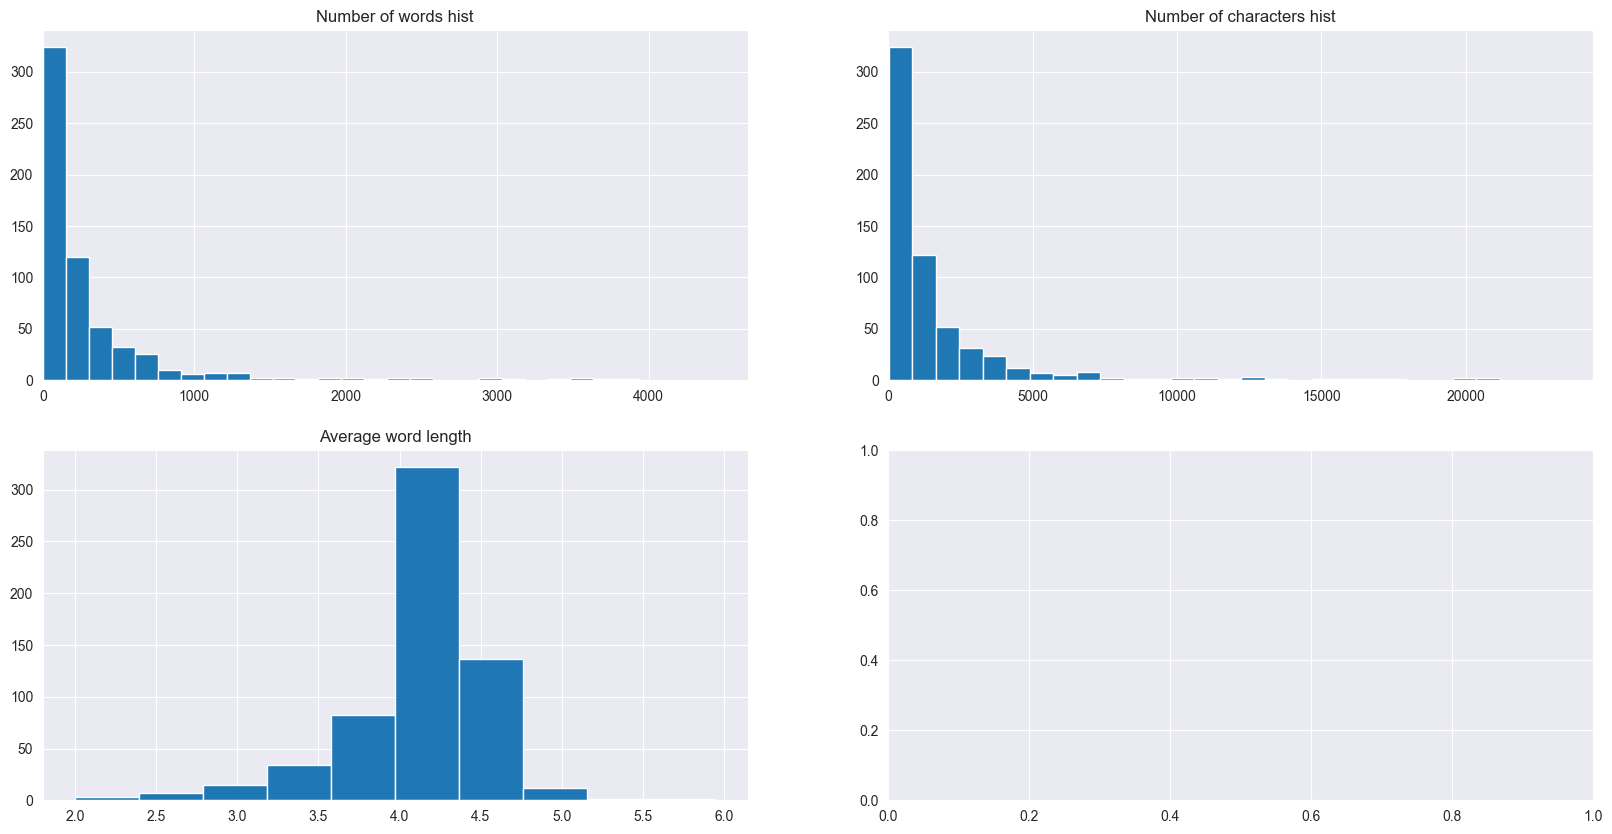

In [32]:
fig, ax = plt.subplots(2, 2)
df_by_book["number_of_words"].hist(ax=ax[0, 0], bins=100)
df_by_book["number_of_chars"].hist(ax=ax[0, 1], bins=100)
ax[0, 0].set_xlim(0, df_by_book["number_of_words"].quantile(0.99))
ax[0, 1].set_xlim(0, df_by_book["number_of_chars"].quantile(0.99))
df_by_book["avg_word_length"].hist(ax=ax[1, 0])
ax[0, 0].set_title("Number of words hist")
ax[0, 1].set_title("Number of characters hist")
ax[1, 0].set_title("Average word length")


/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2851046541.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_processed, y=x_processed, ax=axes[0], palette="Blues_d")
/var/folders/yv/8bscwg3x6m5934xb_mry4d_m0000gr/T/ipykernel_37597/2851046541.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_lemmatized, y=x_lemmatized, ax=axes[1], palette="Greens_d")


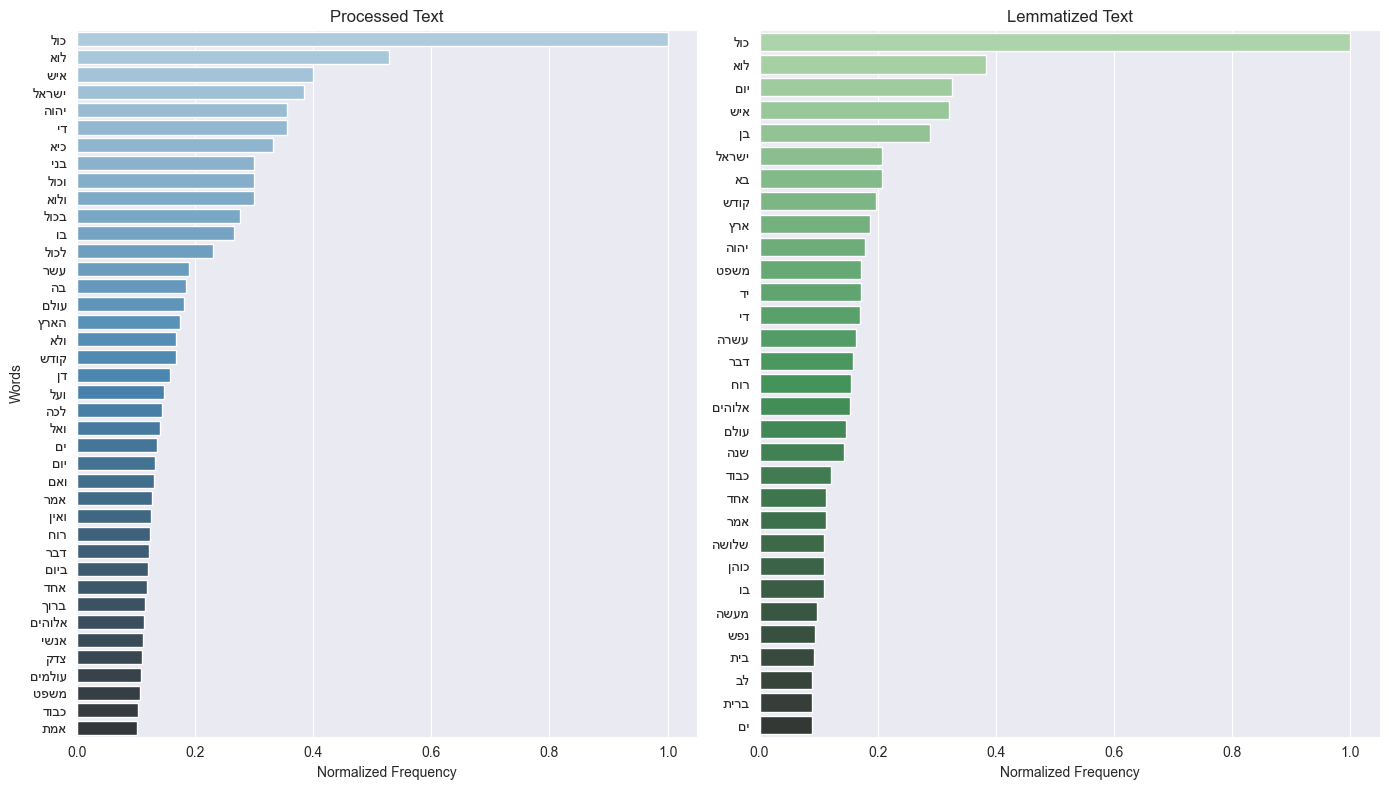

In [92]:
from collections import Counter
import seaborn as sns


def process_text(data, column_name):
    words = data[column_name].str.split()
    words = words.values.tolist()
    corpus = [word for i in words for word in i]
    counter = Counter(corpus)
    most = counter.most_common()

    x, y = [], []
    for word, count in most[:40]:
        if word not in stop_words:
            x.append(word[::-1])  # Reversing the word
            y.append(count)

    return x, y


# Process both columns
x_processed, y_processed = process_text(df_by_book, "processed_text")
x_lemmatized, y_lemmatized = process_text(df_by_book, "lemmatized_text")

# Normalize counts
y_processed = np.array(y_processed) / max(y_processed)
y_lemmatized = np.array(y_lemmatized) / max(y_lemmatized)

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(14, 8), sharey=False)

sns.barplot(x=y_processed, y=x_processed, ax=axes[0], palette="Blues_d")
axes[0].set_title('Processed Text')
axes[0].set_xlabel('Normalized Frequency')
axes[0].set_ylabel('Words')

sns.barplot(x=y_lemmatized, y=x_lemmatized, ax=axes[1], palette="Greens_d")
axes[1].set_title('Lemmatized Text')
axes[1].set_xlabel('Normalized Frequency')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()